# Substitution Ciphers

In [48]:
import string
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pickle

## Introduction

This report examines the design, implementation, and security implications of two fundamental cryptographic techniques: the Caesar Cipher and the Simple Substitution Cipher. These methods provide insight into early encryption strategies and serve as a foundation for understanding modern cryptographic principles. This report includes encryption, decryption, and attack methods.

## Caesar Cipher

The Caesar Cipher is a shift cipher that replaces each letter in the plaintext with another letter a fixed number of positions down the alphabet. The provided implementation (`caesar_encrypt`) performs this shifting mechanism efficiently.

### Encryption

Definig a function that iterates through each character in the plaintext, shifts it according to the given key, and reconstructs the modified ciphertext while preserving non-alphabetic characters.

In [91]:
def caesar_encrypt(plaintext, shift=0):
    ''' Encrypt `plaintext` (str) as a caesar cipher with a given `shift` (int) 
    '''
    alphabet = list(string.ascii_lowercase)  # ['a', 'b', 'c', ..., 'z']
    ciphertext = []  # for store the modified text
    for letter in plaintext:
        if letter in alphabet:
            position = alphabet.index(letter)  # Get index (0-based)
            new_position = (position + shift) % 26  # shift alphabet
            ciphertext.append(alphabet[new_position]) # replace letter by new alphabet
        else:
            ciphertext.append(letter)  # Keep non-alphabet characters unchanged
    ciphertext = ''.join(ciphertext)  # Join list to string
    return ciphertext

In [92]:
# code snippet to test the implementation of the encryption function
plaintext = 'hello!' 
ciphertext = caesar_encrypt(plaintext, shift=4)

print(plaintext, '->', ciphertext) # expected output 'hello! -> lipps!'

hello! -> lipps!


### Decryption

Defining a function that reverses the encryption process by shifting the characters back to their original positions, restoring the plaintext.

In [93]:
def caesar_decrypt(ciphertext, shift=0):
    ''' Decrypt `ciphertext` (str) as a caesar cipher with a given `shift` (int) 
    '''
    alphabet = list(string.ascii_lowercase)  # ['a', 'b', 'c', ..., 'z']
    plaintext = []  # Store the modified text
    for letter in ciphertext:
        if letter in alphabet:
            position = alphabet.index(letter)  # Get index (0-based)
            new_position = (position - shift) % 26  # Ensure wrap-around
            plaintext.append(alphabet[new_position])
        else:
            plaintext.append(letter)  # Keep non-alphabet characters unchanged
    plaintext = ''.join(plaintext)  # Convert list to string

    return plaintext

In [82]:
# code snippet to test the implementation of the decryption function
ciphertext = 'lipps!' # 'hello!' encoded with shift=4
plaintext = caesar_decrypt(ciphertext, shift=4)

print(ciphertext, '->', plaintext)  # expected output 'lipps! -> hello!'

lipps! -> hello!


### Ciphertext

In [89]:
file_path = "ciphertext_caesar.txt"  # Input the Ciphertext file path
with open(file_path, "r", encoding="utf-8") as file:
    ciphertext = file.read().strip()  # Read the whole file and remove extra spaces

### Brute Force Attack

Given that the Caesar Cipher has only 25 possible keys, the brute force attack implemented in the notebook systematically tries all possible shifts and lets the operator evaluate which produces a meaningful result.

In [90]:
for shift in range(26):    #implement decryption algorithm for all shifts
    plaintext = caesar_decrypt(ciphertext, shift) 
    print('__________________________________________________________________')
    print(f"{shift} : {''.join(plaintext[:100])}")

__________________________________________________________________
0 : jgew (alsdasf sfv dslaf: jges, hjgfgmfuwv [ˈjgːes] ) ak lzw ushalsd ualq gx alsdq. al ak sdkg lzw us
__________________________________________________________________
1 : ifdv (zkrczre reu crkze: ifdr, gifefletvu [ˈifːdr] ) zj kyv trgzkrc tzkp fw zkrcp. zk zj rcjf kyv tr
__________________________________________________________________
2 : hecu (yjqbyqd qdt bqjyd: hecq, fhedekdsut [ˈheːcq] ) yi jxu sqfyjqb syjo ev yjqbo. yj yi qbie jxu sq
__________________________________________________________________
3 : gdbt (xipaxpc pcs apixc: gdbp, egdcdjcrts [ˈgdːbp] ) xh iwt rpexipa rxin du xipan. xi xh pahd iwt rp
__________________________________________________________________
4 : fcas (whozwob obr zohwb: fcao, dfcbcibqsr [ˈfcːao] ) wg hvs qodwhoz qwhm ct whozm. wh wg ozgc hvs qo
__________________________________________________________________
5 : ebzr (vgnyvna naq yngva: ebzn, cebabhaprq [ˈebːzn] ) vf gur pncvgny p

In [55]:
shift = 18
plaintext = caesar_decrypt(ciphertext, shift) 
print(f"{shift} : {''.join(plaintext)}")

18 : rome (italian and latin: roma, pronounced [ˈroːma] ) is the capital city of italy. it is also the capital of the lazio region, the centre of the metropolitan city of rome capital, and a special comune (municipality) named comune di roma capitale. with 2,860,009 residents in 1,285 km2 (496.1 sq mi), rome is the country's most populated comune and the third most populous city in the european union by population within city limits. the metropolitan city of rome, with a population of 4,355,725 residents, is the most populous metropolitan city in italy. its metropolitan area is the third-most populous within italy. rome is located in the central-western portion of the italian peninsula, within lazio (latium), along the shores of the tiber valley. vatican city (the smallest country in the world and headquarters of the worldwide catholic church under the governance of the holy see) is an independent country inside the city boundaries of rome, the only existing example of a country within

## Simple Substitution Cipher

A Simple Substitution Cipher maps each letter in the plaintext to a unique letter based on a randomized key. The program includes an implementation that creates such mappings dynamically.

### Encryption

Defining a function that substitutes each letter in the plaintext with a corresponding mapped letter from a predefined key using a dictionary structure.

In [56]:
def substitution_encrypt(plaintext, mapping):
    ''' Encrypt `ciphertext` (str) as a simple substitution cipher with a given 
        `mapping` (??) from plaintext letters to ciphertext letters '''
		
    ciphertext = []		# Create an empty list to collect encrypted characters
    # Iterate over each character in the plaintext
    for char in plaintext:
        if char.isalpha():  # Check if the character is an alphabetic letter
            ciphertext.append(mapping[char])  # If it's a letter, substitute it using the mapping
        else:
            ciphertext.append(char)  # If it's not a letter (e.g., punctuation or space), keep it as is
    
    ciphertext = ''.join(ciphertext)  # Join the list of characters into a string to form the ciphertext
    return ciphertext  # Return the final encrypted string 

In [57]:
# code snippet to test the implementation of the encryption function
plaintext = 'hello!'
mapping = {'h': 'a', 'e': 'p', 'l': 'w', 'o': 'q'} 

ciphertext = substitution_encrypt(plaintext, mapping)

print(plaintext, '->', ciphertext) # expected output 'hello! -> apwwq!'

hello! -> apwwq!


### Decryption

The decryption function (`substitution_decrypt`) reverses this process by using an inverse mapping of the key to restore the original plaintext.

In [58]:
def substitution_decrypt(ciphertext, mapping):
    ''' Decrypt `ciphertext` (str) as a simple substitution cipher with a given 
       `mapping` (dict) from plaintext letters to ciphertext letters '''
    
    inverse_mapping = {v: k for k, v in mapping.items()}  # Create an inverse mapping
    plaintext = []  # Create an empty list to collect decrypted characters
    
    for char in ciphertext:
        if char.isalpha() and char.isascii():
            plaintext.append(inverse_mapping[char])  # Append to the plaintext list
        else:
            plaintext.append(char)  # Append non-alphabet characters as is
    
    plaintext = ''.join(plaintext)  # Join the list into a string
    return plaintext


In [59]:
# code snippet to test the implementation of the decryption function
mapping = {'h': 'a', 'e': 'p', 'l': 'w', 'o': 'q'}  # previous mapping 
ciphertext = 'apwwq!'

plaintext = substitution_decrypt(ciphertext, mapping)

print(ciphertext, '->', plaintext)  # expected output 'apwwq! -> hello!'

apwwq! -> hello!


### Ciphertext

In [60]:
# Load ciphertext
with open("ciphertext_simple.txt", "r", encoding="utf-8") as file:
    ctext = file.read()
    print(ctext)

vf pseygdtsbyce, b lxolgvgxgvdf pvycms vl b kmgcdj dr mfpseygvft vf ucvpc xfvgl dr ywbvfgmng bsm smywbpmj uvgc gcm pvycmsgmng, vf b jmrvfmj kbffms, uvgc gcm cmwy dr b qme; gcm "xfvgl" kbe om lvftwm wmggmsl (gcm kdlg pdkkdf), ybvsl dr wmggmsl, gsvywmgl dr wmggmsl, kvngxsml dr gcm bodam, bfj ld rdsgc. gcm smpmvams jmpvycmsl gcm gmng oe ymsrdskvft gcm vfamslm lxolgvgxgvdf ysdpmll gd mngsbpg gcm dsvtvfbw kmllbtm.
lxolgvgxgvdf pvycmsl pbf om pdkybsmj uvgc gsbflydlvgvdf pvycmsl. vf b gsbflydlvgvdf pvycms, gcm xfvgl dr gcm ywbvfgmng bsm smbssbftmj vf b jvrrmsmfg bfj xlxbwwe hxvgm pdkywmn dsjms, oxg gcm xfvgl gcmklmwaml bsm wmrg xfpcbftmj. oe pdfgsblg, vf b lxolgvgxgvdf pvycms, gcm xfvgl dr gcm ywbvfgmng bsm smgbvfmj vf gcm lbkm lmhxmfpm vf gcm pvycmsgmng, oxg gcm xfvgl gcmklmwaml bsm bwgmsmj.
gcmsm bsm b fxkoms dr jvrrmsmfg geyml dr lxolgvgxgvdf pvycms. vr gcm pvycms dymsbgml df lvftwm wmggmsl, vg vl gmskmj b lvkywm lxolgvgxgvdf pvycms; b pvycms gcbg dymsbgml df wbstms tsdxyl dr wmggmsl vl gm

### Frequency Analysis Attack

This cipher is vulnerable to frequency analysis, which is implemented using the Counter module to compare letter frequencies in the ciphertext against known English letter distributions.

#### English Letters Distribution

This code cell includes a letter frequency analysis function(`letter_distribution`) to evaluate the distribution of characters, leveraging known statistical patterns to deduce the mapping.

In [61]:
# function to infer the letter distribution from a text
def letter_distribution(text):
    ''' Return the `distribution` (??) of the letters in `text` (str) '''
   
    filtered_txt = ''.join([char for char in text if char in string.ascii_lowercase])
    n = len(filtered_txt)
    distribution = Counter(filtered_txt)
    distribution = {char: count / n for char, count in sorted(distribution.items())}
    return distribution

In [62]:
# code snippet to test the implementation of `letter_distribution`
text = 'hello world!'

letter_distribution(text)
# expected ouput: 
# {'d': 0.1, 'e': 0.1, 'h': 0.1, 'l': 0.3, 'o': 0.2, 'r': 0.1, 'w': 0.1, ...}

{'d': 0.1, 'e': 0.1, 'h': 0.1, 'l': 0.3, 'o': 0.2, 'r': 0.1, 'w': 0.1}

In [63]:
# Load English Text
with open("wikipedia_cybersecurity.txt", "r", encoding="utf-8") as file:
    txt = file.read().lower()
    print(txt)

computer security (also cybersecurity, digital security, or information technology (it) security) is the protection of computer software, systems and networks from threats that can lead to unauthorized information disclosure, theft or damage to hardware, software, or data, as well as from the disruption or misdirection of the services they provide.
the significance of the field stems from the expanded reliance on computer systems, the internet, and wireless network standards. its importance is further amplified by the growth of smart devices, including smartphones, televisions, and the various devices that constitute the internet of things (iot). cybersecurity has emerged as one of the most significant new challenges facing the contemporary world, due to both the complexity of information systems and the societies they support. security is particularly crucial for systems that govern large-scale systems with far-reaching physical effects, such as power distribution, elections, and fina

In [64]:
# estimate the English letters distribution 
txt_distribituin = letter_distribution(txt)
print(txt_distribituin)

{'a': 0.08336034710620153, 'b': 0.014138593122709025, 'c': 0.0492232501309129, 'd': 0.03482283120963519, 'e': 0.12123781263247138, 'f': 0.02013565069944892, 'g': 0.01829040221429818, 'h': 0.03148143530409196, 'i': 0.07761264743286038, 'j': 0.0008727526618956188, 'k': 0.008316086078348254, 'l': 0.03512206069371369, 'm': 0.02673116724434581, 'n': 0.07302446201032342, 'o': 0.07129142458170212, 'p': 0.02296586290302471, 'q': 0.0006233947584968706, 'r': 0.06937136872553176, 's': 0.07490711418098396, 't': 0.09365882851656983, 'u': 0.02767872727726105, 'v': 0.011482931451512355, 'w': 0.011370720394982919, 'x': 0.0015958905817519886, 'y': 0.01921302645687355, 'z': 0.0014712116300526145}


Text(0, 0.5, 'Frequency')

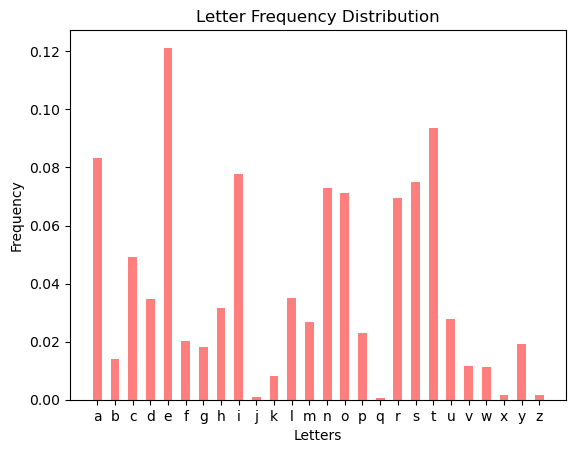

In [65]:
# plot the English letter distribution
plt.bar(txt_distribituin.keys(), txt_distribituin.values(), align="center", width=0.5, alpha=0.5, color="red")
plt.title("Letter Frequency Distribution")
plt.xlabel("Letters")
plt.ylabel("Frequency")

In [66]:
# store the distribution as a pickle file
with open("eng_dst.pkl", "wb") as f:
    pickle.dump(txt_distribituin, f)

#### Perform attack

This code generates an initial letter mapping by comparing frequency distributions of the ciphertext and the expected plaintext. It:  

1. **Computes Letter Frequencies** – Analyzes letter distribution in the ciphertext (`ciphertext_distribution`).  
2. **Sorts by Frequency** – Orders both the ciphertext and expected plaintext distributions in descending order.  
3. **Creates an Initial Mapping** – Matches the most frequent letters in the plaintext with those in the ciphertext using `zip()`.  

This provides a starting point for decrypting a **substitution cipher** using frequency analysis.

Text(0, 0.5, 'Frequency')

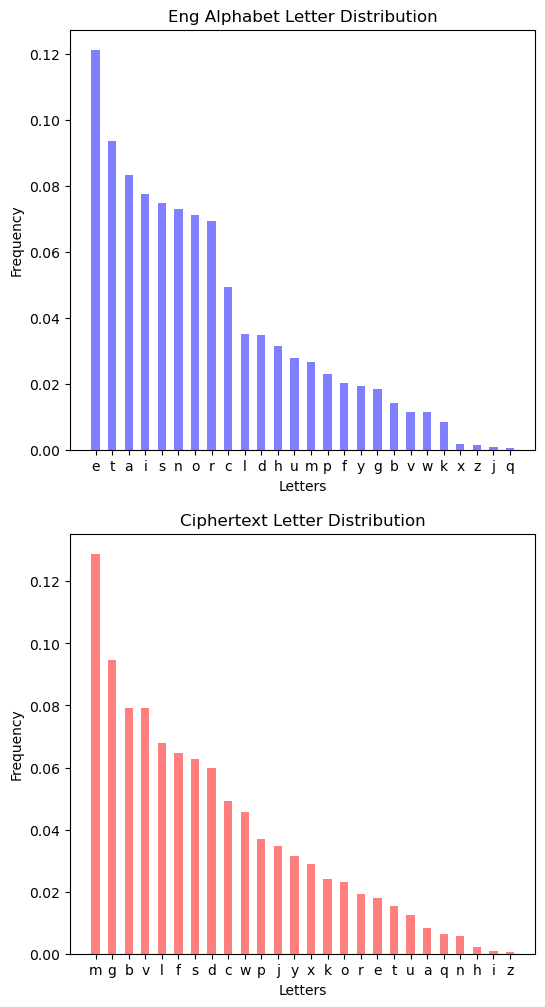

In [67]:
# perform Frequency analysis attack
ciphertext_distribiution = letter_distribution(ctext)
ciphertext_distribiution = {k: v for k, v in sorted(ciphertext_distribiution.items(), key=lambda x: x[1], reverse=True)}
txt_distribituin = {k: v for k, v in sorted(txt_distribituin.items(), key=lambda x: x[1], reverse=True)}
mapping = {txt_key: cipher_key for (txt_key, _), (cipher_key, _) in zip(txt_distribituin.items(), ciphertext_distribiution.items())}
fig , axes = plt.subplots(2, 1, figsize=(6, 12))
axes[0].bar(txt_distribituin.keys(), txt_distribituin.values(), align="center", width=0.5, alpha=0.5, color="blue")
axes[0].set_title("Eng Alphabet Letter Distribution")
axes[0].set_xlabel("Letters")
axes[0].set_ylabel("Frequency")
axes[1].bar(ciphertext_distribiution.keys(), ciphertext_distribiution.values(), align="center", width=0.5, alpha=0.5, color="red")
axes[1].set_title("Ciphertext Letter Distribution")
axes[1].set_xlabel("Letters")
axes[1].set_ylabel("Frequency")


In [68]:
# print mapping
print(mapping)

{'e': 'm', 't': 'g', 'a': 'b', 'i': 'v', 's': 'l', 'n': 'f', 'o': 's', 'r': 'd', 'c': 'c', 'l': 'w', 'd': 'p', 'h': 'j', 'u': 'y', 'm': 'x', 'p': 'k', 'f': 'o', 'y': 'r', 'g': 'e', 'b': 't', 'v': 'u', 'w': 'a', 'k': 'q', 'x': 'n', 'z': 'h', 'j': 'i', 'q': 'z'}


In [69]:
# print decrypted plaintext
plaintext = substitution_decrypt(ctext, mapping)
print(plaintext)


in dogutrboaucg, a smfstitmtirn diuceo is a petcrh ry endogutinb in vcidc mnits ry ulaintext aoe oeuladeh vitc tce diuceotext, in a heyineh panneo, vitc tce celu ry a keg; tce "mnits" pag fe sinble letteos (tce prst drpprn), uaios ry letteos, toiulets ry letteos, pixtmoes ry tce afrwe, anh sr yrotc. tce oedeiweo hediuceos tce text fg ueoyropinb tce inweose smfstitmtirn uordess tr extoadt tce roibinal pessabe.
smfstitmtirn diuceos dan fe drpuaoeh vitc toansursitirn diuceos. in a toansursitirn diuceo, tce mnits ry tce ulaintext aoe oeaooanbeh in a hiyyeoent anh msmallg zmite drpulex roheo, fmt tce mnits tcepselwes aoe leyt mndcanbeh. fg drntoast, in a smfstitmtirn diuceo, tce mnits ry tce ulaintext aoe oetaineh in tce sape sezmende in tce diuceotext, fmt tce mnits tcepselwes aoe alteoeh.
tceoe aoe a nmpfeo ry hiyyeoent tgues ry smfstitmtirn diuceo. iy tce diuceo rueoates rn sinble letteos, it is teopeh a sipule smfstitmtirn diuceo; a diuceo tcat rueoates rn laobeo bormus ry letteos is te

#### Update the mapping

As it is obvious in the printed plaintext, the mapping isn't fully correct and it needs to be updated with the correct values. We make an educated guess on what is the actual word in the main plaintext based on the word in the obtained plaintext and update the mapping.

*exteonal links* --> *external links* --> r : o

*a knrvn ulaintext attadk* --> *a known plaintext attack* --> o : r , w : v, p : u , c : d

then we search the mapping for these values and then write the right mapping.

`new_mapping = {'r' : 's', 'o' : 'd', 'w' : 'u', 'p' : 'y', 'c' : 'p'}`

Now we must update the mapping in our program, these are the steps:

1. **Updating the Mapping** – The program takes `new_mapping`, a dictionary of corrections, and updates the existing mapping.
2. **Handling Conflicts** – If a letter in (`new_mapping`) is already assigned in `mapping`, the code swaps values to maintain uniqueness.
3. **Applying Changes** – The mapping is updated, ensuring correct letter assignments while avoiding duplicates.
4. **Decrypting Again** – The refined mapping is used to decrypt the ciphertext, bringing the output closer to the correct plaintext.
5. **Repeating Until Correct** – This process is repeated with new educated guesses until the plaintext is fully recovered.

In [70]:
new_mapping = {'r' : 's', 'o' : 'd', 'w' : 'u', 'p' : 'y', 'c' : 'p'}

reverse_mapping = {v: k for k, v in mapping.items()}

for key, new_value in new_mapping.items():
    # Find the key that currently holds new_value
    old_key = reverse_mapping[new_value]

    # Swap values
    mapping[old_key], mapping[key] = mapping[key], new_value

    # Update reverse mapping
    reverse_mapping[mapping[old_key]] = old_key
    reverse_mapping[mapping[key]] = key
        

print(f'mapping: {mapping}\n')              
print(f'plaintext:\n {substitution_decrypt(ctext, mapping)}')

mapping: {'e': 'm', 't': 'g', 'a': 'b', 'i': 'v', 's': 'l', 'n': 'f', 'o': 'd', 'r': 's', 'c': 'p', 'l': 'w', 'd': 'c', 'h': 'j', 'u': 'k', 'm': 'x', 'p': 'y', 'f': 'o', 'y': 'r', 'g': 'e', 'b': 't', 'v': 'a', 'w': 'u', 'k': 'q', 'x': 'n', 'z': 'h', 'j': 'i', 'q': 'z'}

plaintext:
 in crgptobrapdg, a smfstitmtion cipder is a uetdoh oy encrgptinb in wdicd mnits oy plaintext are replaceh witd tde cipdertext, in a heyineh uanner, witd tde delp oy a keg; tde "mnits" uag fe sinble letters (tde uost couuon), pairs oy letters, triplets oy letters, uixtmres oy tde afove, anh so yortd. tde receiver hecipders tde text fg peryoruinb tde inverse smfstitmtion process to extract tde oribinal uessabe.
smfstitmtion cipders can fe coupareh witd transposition cipders. in a transposition cipder, tde mnits oy tde plaintext are rearranbeh in a hiyyerent anh msmallg zmite couplex orher, fmt tde mnits tdeuselves are leyt mncdanbeh. fg contrast, in a smfstitmtion cipder, tde mnits oy tde plaintext are retaine

cipver --> cipher

lossless hata codpression --> lossless data compression --> d : h , m : d 

*reyerences* --> *references* --> f : y

*encrgption* --> *encryption* --> y : g

*smfstitmtion* --> *substitution* --> u : m , b : f

`new_mapping = {'m' : 'k', 'y' : 'e', 'd' : 'j' , 'f' : 'r' , 'u' : 'x' , 'b' : 'o'}`

In [71]:
new_mapping = {'m' : 'k', 'y' : 'e', 'd' : 'j' , 'f' : 'r' , 'u' : 'x' , 'b' : 'o'}

reverse_mapping = {v: k for k, v in mapping.items()}

for key, new_value in new_mapping.items():
    # Find the key that currently holds new_value
    old_key = reverse_mapping[new_value]

    # Swap values
    mapping[old_key], mapping[key] = mapping[key], new_value

    # Update reverse mapping
    reverse_mapping[mapping[old_key]] = old_key
    reverse_mapping[mapping[key]] = key

print(f'mapping: {mapping}\n')
print(f'plaintext:\n {substitution_decrypt(ctext, mapping)}')

mapping: {'e': 'm', 't': 'g', 'a': 'b', 'i': 'v', 's': 'l', 'n': 'f', 'o': 'd', 'r': 's', 'c': 'p', 'l': 'w', 'd': 'j', 'h': 'c', 'u': 'x', 'm': 'k', 'p': 'y', 'f': 'r', 'y': 'e', 'g': 't', 'b': 'o', 'v': 'a', 'w': 'u', 'k': 'q', 'x': 'n', 'z': 'h', 'j': 'i', 'q': 'z'}

plaintext:
 in cryptography, a substitution cipher is a method of encrypting in which units of plaintext are replaced with the ciphertext, in a defined manner, with the help of a key; the "units" may be single letters (the most common), pairs of letters, triplets of letters, mixtures of the above, and so forth. the receiver deciphers the text by performing the inverse substitution process to extract the original message.
substitution ciphers can be compared with transposition ciphers. in a transposition cipher, the units of the plaintext are rearranged in a different and usually zuite complex order, but the units themselves are left unchanged. by contrast, in a substitution cipher, the units of the plaintext are retaine

*unizue* --> *unique* --> q : z

`new_mapping = {'q' : 'h'}`

In [72]:
new_mapping = {'q' : 'h'}

reverse_mapping = {v: k for k, v in mapping.items()}

for key, new_value in new_mapping.items():
    # Find the key that currently holds new_value
    old_key = reverse_mapping[new_value]

    # Swap values
    mapping[old_key], mapping[key] = mapping[key], new_value

    # Update reverse mapping
    reverse_mapping[mapping[old_key]] = old_key
    reverse_mapping[mapping[key]] = key

print(f'mapping: {mapping}\n')
print(f'plaintext:\n {substitution_decrypt(ctext, mapping)}')

mapping: {'e': 'm', 't': 'g', 'a': 'b', 'i': 'v', 's': 'l', 'n': 'f', 'o': 'd', 'r': 's', 'c': 'p', 'l': 'w', 'd': 'j', 'h': 'c', 'u': 'x', 'm': 'k', 'p': 'y', 'f': 'r', 'y': 'e', 'g': 't', 'b': 'o', 'v': 'a', 'w': 'u', 'k': 'q', 'x': 'n', 'z': 'z', 'j': 'i', 'q': 'h'}

plaintext:
 in cryptography, a substitution cipher is a method of encrypting in which units of plaintext are replaced with the ciphertext, in a defined manner, with the help of a key; the "units" may be single letters (the most common), pairs of letters, triplets of letters, mixtures of the above, and so forth. the receiver deciphers the text by performing the inverse substitution process to extract the original message.
substitution ciphers can be compared with transposition ciphers. in a transposition cipher, the units of the plaintext are rearranged in a different and usually quite complex order, but the units themselves are left unchanged. by contrast, in a substitution cipher, the units of the plaintext are retaine

## Conclusion

The provided Python implementation highlights the vulnerabilities of both the **Caesar Cipher** and **Simple Substitution Cipher**. While the Caesar Cipher is trivially broken using brute force, the Simple Substitution Cipher requires a more advanced frequency analysis attack. The results emphasize the importance of using more secure cryptographic techniques in real-world applications.

## Affine cipher

### Encryption

In [73]:
from math import gcd

In [74]:

def affine_encrypt(plaintext, a, b):
    ''' Encrypt `plaintext` (str) as an affine cipher with given `a` and `b` 
    '''
    ciphertext = []
    for char in plaintext:
        if char.isalpha():
            char = chr(((a * (ord(char) - ord('a')) + b) % 26) + ord('a'))
        ciphertext.append(char)
    ciphertext = ''.join(ciphertext)
    return ciphertext

In [75]:
plaintext = 'hello world!'
a, b = 3, 1

ciphertext = affine_encrypt(plaintext, a, b)
print(plaintext, '->', ciphertext) # expected output 'hello world! -> wniir praik!'

hello world! -> wniir praik!


### Decryption

In [76]:
def affine_decrypt(ciphertext, a, b):
    ''' Decrypt `ciphertext` (str) as an affine cipher with given `a` and `b` 
    '''
    a_inv = 0
    for i in range(26):
        if (a * i) % 26 == 1:
            a_inv = i
            break
    
    plaintext = []
    for char in ciphertext:
        if char.isalpha():
            char = chr(((a_inv * (ord(char) - ord('a') - b)) % 26) + ord('a'))
        plaintext.append(char)
    plaintext = ''.join(plaintext)
    return plaintext

In [77]:
ciphertext = 'wniir praik!'
a, b = 3, 1

plaintext = affine_decrypt(ciphertext, a, b)
print(ciphertext, '->', plaintext) # expected output 'wniir praik! -> hello world!'

wniir praik! -> hello world!


### Ciphertext

In [78]:
# Load ciphertext
with open('ciphertext_affine.txt', 'r') as file:
    ciphertext = file.read()

### Breaking Cipher

In [79]:
freq = letter_distribution(ciphertext)
freq = {k: v for k, v in sorted(freq.items(), key=lambda x: x[1], reverse=True)}
mapping = {k: v for k, v in zip( txt_distribituin.keys(), freq.keys())}
print(mapping)

{'e': 'r', 't': 'y', 'a': 'f', 'i': 'd', 's': 'q', 'n': 'n', 'o': 'b', 'r': 'e', 'c': 'i', 'l': 'x', 'd': 'w', 'h': 'k', 'u': 't', 'm': 'u', 'p': 'o', 'f': 'a', 'y': 'v', 'g': 'j', 'b': 'l', 'v': 'p', 'w': 'm', 'k': 's', 'x': 'z', 'z': 'h', 'j': 'g'}


In [80]:
keys = list(mapping.keys())
x_1 , x_2 = (ord(keys[0]) - ord('a')) % 26 , (ord(keys[1]) - ord('a')) % 26
y_1 , y_2 = (ord(mapping[keys[0]]) - ord('a')) % 26, (ord(mapping[keys[1]]) - ord('a')) % 26

a = ((y_2 - y_1) * pow((x_2 - x_1), -1, 26)) % 26
b = (y_1 - a * x_1) % 26

if gcd(a, 26) == 1:
    decrypted = affine_decrypt(ciphertext, a, b)
    print(decrypted)
else:
    print('a is not invertible')

the affine cipher is a type of monoalphabetic substitution cipher, where each letter in an alphabet is mapped to its numeric equivalent, encrypted using a simple mathematical function, and converted back to a letter. the formula used means that each letter encrypts to one other letter, and back again, meaning the cipher is essentially a standard substitution cipher with a rule governing which letter goes to which. as such, it has the weaknesses of all substitution ciphers. each letter is enciphered with the function (ax + b) mod 26, where b is the magnitude of the shift.


== description ==
here, the letters of an alphabet of size m are first mapped to the integers in the range 0 ... m  1. it then uses modular arithmetic to transform the integer that each plaintext letter corresponds to into another integer that correspond to a ciphertext letter.
the encryption function for a single letter is 

  
    
      
        e
        (
        x
        )
        =
        (
        a
       

## Conclusion

The Affine cipher is **insecure** because it preserves letter frequencies, making it vulnerable to **frequency analysis** and **brute force attacks** due to its small keyspace. Our Python code demonstrates how easily it can be broken, proving it's unsuitable for modern encryption.